# 1. Pendulum

다음처럼 주어지는 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 $\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.


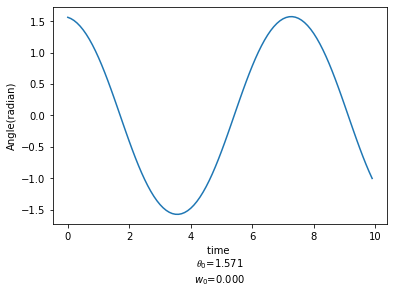

In [4]:
import numpy as np
import matplotlib.pyplot as plt
dt=0.1
t=np.arange(0,10,dt)
g=9.8
l=9.8
a=np.array([])
a0=0.5*np.pi
w0=0

for i in t:
    dw=-g/l*np.sin(a0)*dt
    w0+=dw
    da=w0*dt
    a0+=da
    a = np.append(a,a0)

plt.plot(t,a)
plt.xlabel("time \n$𝜃_0$=%.3f \n$w_0$=%.3f"%(0.5*np.pi,0))
plt.ylabel("Angle(radian)")
plt.show()

# 2. Pendulum (small oscillations)

1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면
$\sin\theta \approx \theta$ 근사를 적용할 수 있다.

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

1


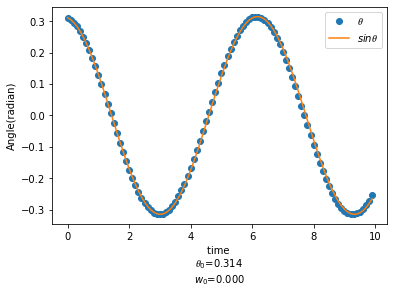

2


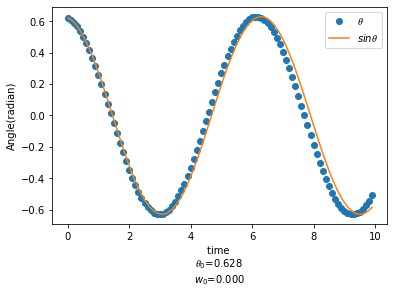

3


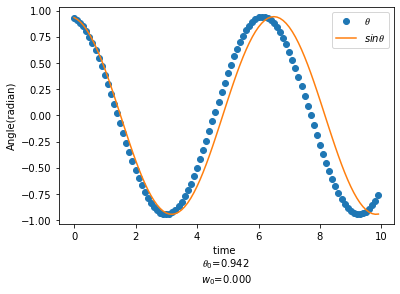

4


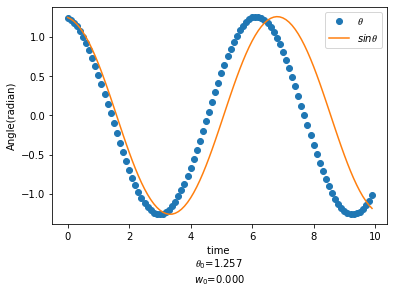

5


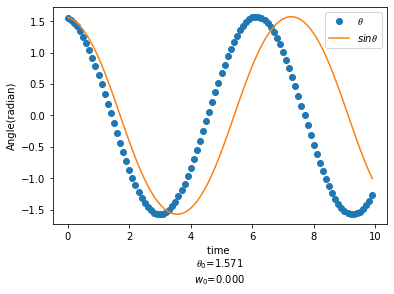

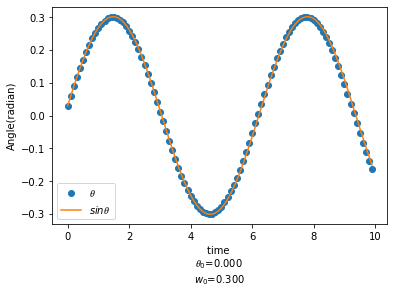

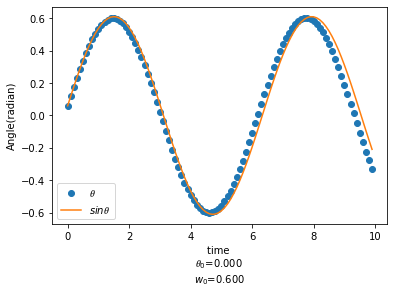

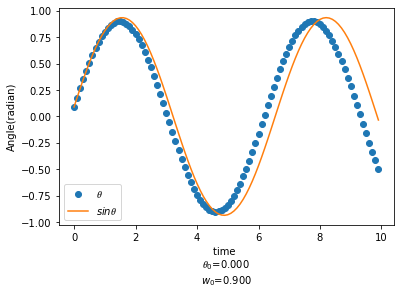

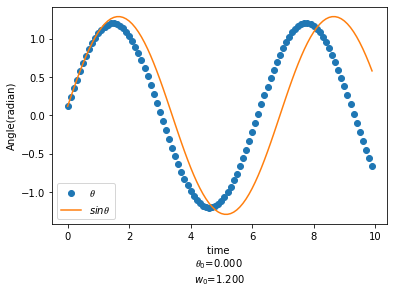

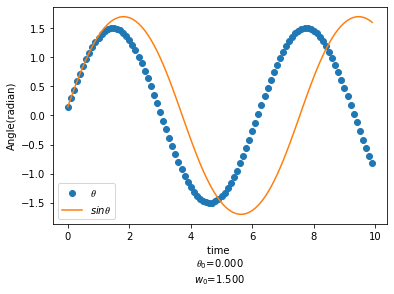

In [5]:
dt=0.1
t=np.arange(0,10,dt)
g=9.8
l=9.8





for j in range(1,6):
    print(j)
    a0=j*0.1*np.pi
    w0=0
    at=a0
    w=w0
    ansin=np.array([])
    for i in t:
        dw=-g/l*at*dt
        w+=dw
        da=w*dt
        at+=da
        ansin = np.append(ansin,at)
    
    asin=np.array([])
    at=a0
    w=w0
    for i in t:
        dw=-g/l*np.sin(at)*dt
        w+=dw
        da=w*dt
        at+=da
        asin = np.append(asin,at)
    
    plt.plot(t,ansin,'o',label="$𝜃$")
    plt.plot(t,asin,label="$sin𝜃$")
    plt.xlabel("time \n$𝜃_0$=%.3f \n$w_0$=%.3f"%(a0,w0))
    plt.ylabel("Angle(radian)")
    plt.legend()
    plt.show()
    
for j in range(1,6):
    
    a0=0
    w0=j*0.3
    at=a0
    w=w0
    ansin=np.array([])
    for i in t:
        dw=-g/l*at*dt
        w+=dw
        da=w*dt
        at+=da
        ansin = np.append(ansin,at)
    
    asin=np.array([])
    at=a0
    w=w0
    for i in t:
        dw=-g/l*np.sin(at)*dt
        w+=dw
        da=w*dt
        at+=da
        asin = np.append(asin,at)
    
    plt.plot(t,ansin,'o',label="$𝜃$")
    plt.plot(t,asin,label="$sin𝜃$")
    plt.xlabel("time \n$𝜃_0$=%.3f \n$w_0$=%.3f"%(a0,w0))
    plt.ylabel("Angle(radian)")
    plt.legend()
    plt.show()

# 3. Damped Pendulum
다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다.

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

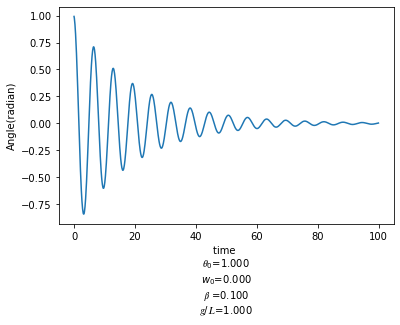

In [6]:
import numpy as np
import matplotlib.pyplot as plt
dt=0.1
t=np.arange(0,100,dt)
g=9.8
l=9.8
a=np.array([])
a0=1
w0=0
b=0.1

for i in t:
    dw=(-b*w0-g/l*np.sin(a0))*dt
    w0+=dw
    da=w0*dt
    a0+=da
    a = np.append(a,a0)

plt.plot(t,a)
plt.xlabel("time \n$𝜃_0$=%.3f \n$w_0$=%.3f\n$𝛽$ =%.3f\n$𝑔/𝐿$=%.3f"%(1,0,0.1,1))
plt.ylabel("Angle(radian)")
plt.show()

# 4. Forced Pendulum
다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$$\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다.

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라.

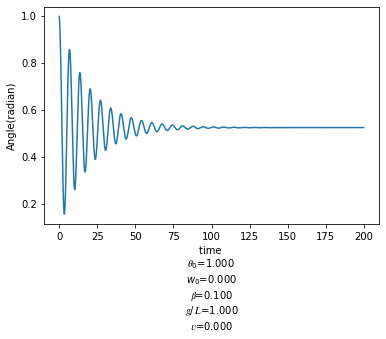

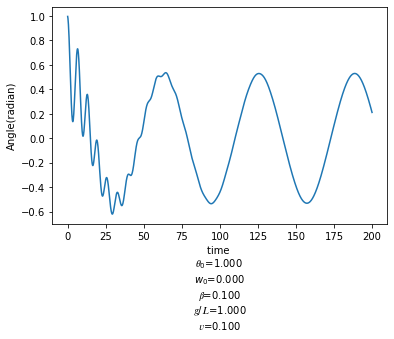

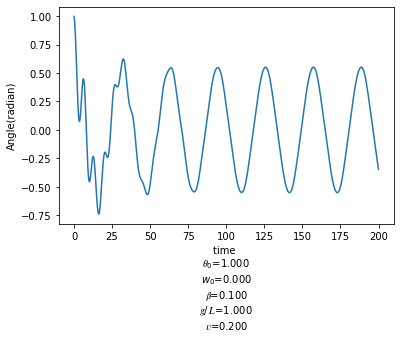

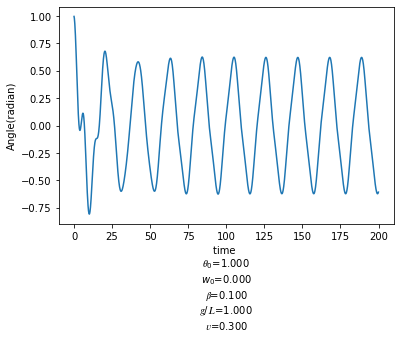

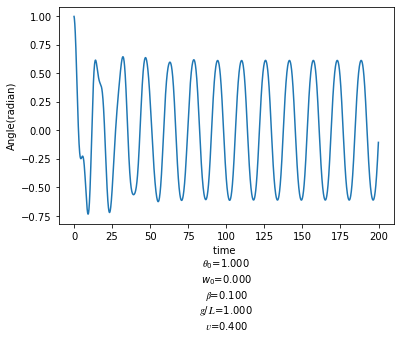

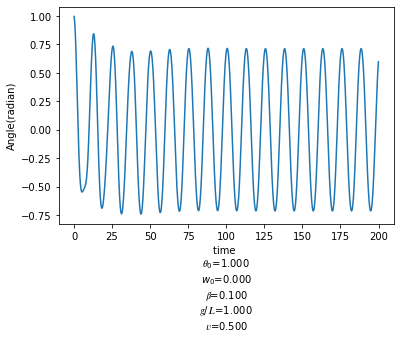

In [7]:
import numpy as np
import matplotlib.pyplot as plt
dt=0.1
t=np.arange(0,200,dt)

g=9.8
l=9.8
for j in range(0,6):
    
    a=np.array([])
    a0=1
    w0=0
    b=0.1
    A=0.5
    v=0.1*j
    t0=0


    for i in t:
        dw=(-(b*w0)-(g/l*np.sin(a0))+(A*np.cos(v*t0)))*dt
        w0+=dw
        da=w0*dt
        a0+=da
        a = np.append(a,a0)
        t0+=dt

    plt.plot(t,a)
    plt.xlabel("time \n$𝜃_0$=%.3f \n$w_0$=%.3f\n$𝛽$=%.3f\n$𝑔/𝐿$=%.3f\n$𝑣$=%.3f"%(1,0,0.1,1,v))
    plt.ylabel("Angle(radian)")
    plt.show()

-1

결국 v의 효과는 무엇인가요?